### Predicting the Forest Cover Type - Multiclass classification (7 classes)

All of my projects are divided in 3 parts - 
* Preprocessing and visualisation of the data 
* Analysis of the data using machine learning algorithms 
* Validation and final testing with a test set(if exists)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from collections import defaultdict
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
rcParams['figure.figsize'] = (10, 5)

In [2]:
#read the data
df = pd.read_csv('data/train.csv')

### Preprocessing and EDA

In [3]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
#there are no null values in the data, good for us
df.dropna().shape, df.shape

((15120, 56), (15120, 56))

In [5]:
#We don't need the below columns as they have the same value throughout the dataset
df.drop(['Soil_Type7', 'Soil_Type15'], inplace = True, axis = 1)

In [6]:
df.shape

(15120, 54)

In [7]:
grouped = df.groupby('Cover_Type').mean()

In [8]:
grouped_std = df.groupby('Cover_Type').std()

In [9]:
grouped

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,7996.077778,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,...,0.052778,0.106481,0.085185,0.000000,0.001389,0.000000,0.000000,0.037037,0.036574,0.022685
2,6312.696759,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,...,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.000000,0.003241,0.001389,0.001389
3,8127.537500,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,...,0.000000,0.002315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,6354.585648,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6486.800463,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,...,0.040278,0.046296,0.053241,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,8061.305093,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,...,0.003241,0.013889,0.030556,0.000926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,9584.496759,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,...,0.012500,0.032407,0.031019,0.001852,0.045370,0.003704,0.015741,0.296759,0.266204,0.188426


In [10]:
grouped_std

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,4546.422030,156.124988,117.280496,6.817153,221.250993,55.740461,1495.176212,25.399338,17.975428,36.114843,...,0.223641,0.308524,0.279222,0.000000,0.037251,0.000000,0.0000,0.188896,0.187757,0.148932
2,5052.088621,185.778268,107.320930,7.038483,215.373206,59.137843,1629.381089,25.033870,18.216843,35.187638,...,0.207149,0.322749,0.279222,0.074345,0.021517,0.030422,0.0000,0.056848,0.037251,0.037251
3,4094.227216,194.108147,108.013267,8.888591,142.053957,58.333807,620.000509,40.366706,27.519785,51.582375,...,0.000000,0.048068,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
4,3776.137635,102.929940,88.846589,9.361156,138.452917,58.343108,361.208979,24.288340,21.006249,49.383949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
5,4537.811303,96.177469,91.772285,8.440048,179.159524,58.463641,1041.100986,22.487451,25.980805,50.121931,...,0.196655,0.210175,0.224565,0.043003,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
6,3949.174092,188.966981,133.087862,7.714618,125.770515,47.034674,576.384899,33.684031,23.934851,45.588500,...,0.056848,0.117057,0.172150,0.030422,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
7,3315.134330,109.126811,110.912616,7.315810,293.786336,80.400320,1206.313419,23.561316,19.405921,37.999255,...,0.111128,0.177121,0.173408,0.043003,0.208163,0.060759,0.1245,0.456935,0.442074,0.391142


In [11]:
features = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Cover_Type']
small_df = df.ix[:1000, features] 

/usr/local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


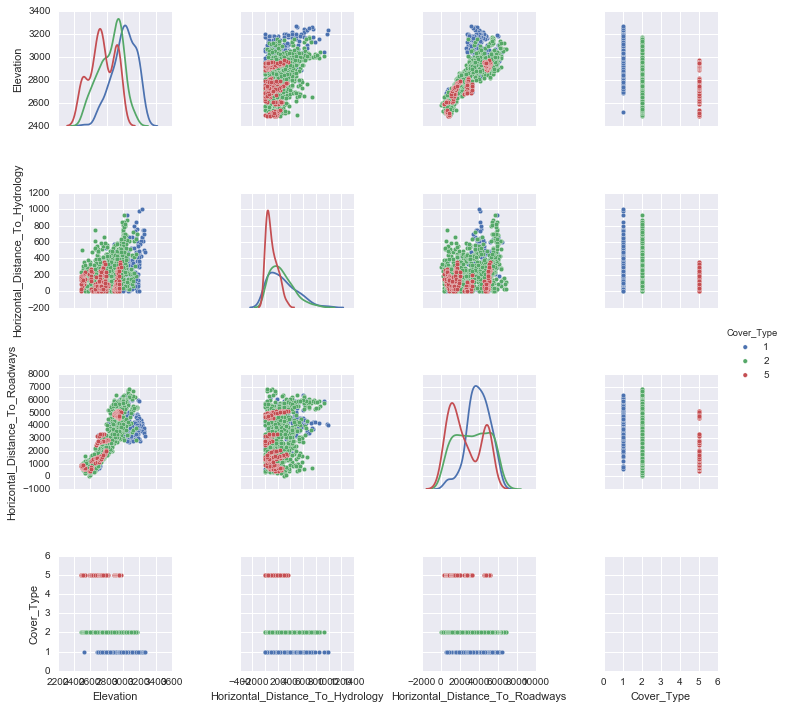

In [12]:
sns.pairplot(small_df, hue = 'Cover_Type', diag_kind='kde')

The only interesting thing I'm able to see in this plot is the distance to the roadways is increasing as the elevation is increasing...which means both the features are correlated. And correlated features can screw the results in the predictions..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fb7d630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fe4ae80>]], dtype=object)

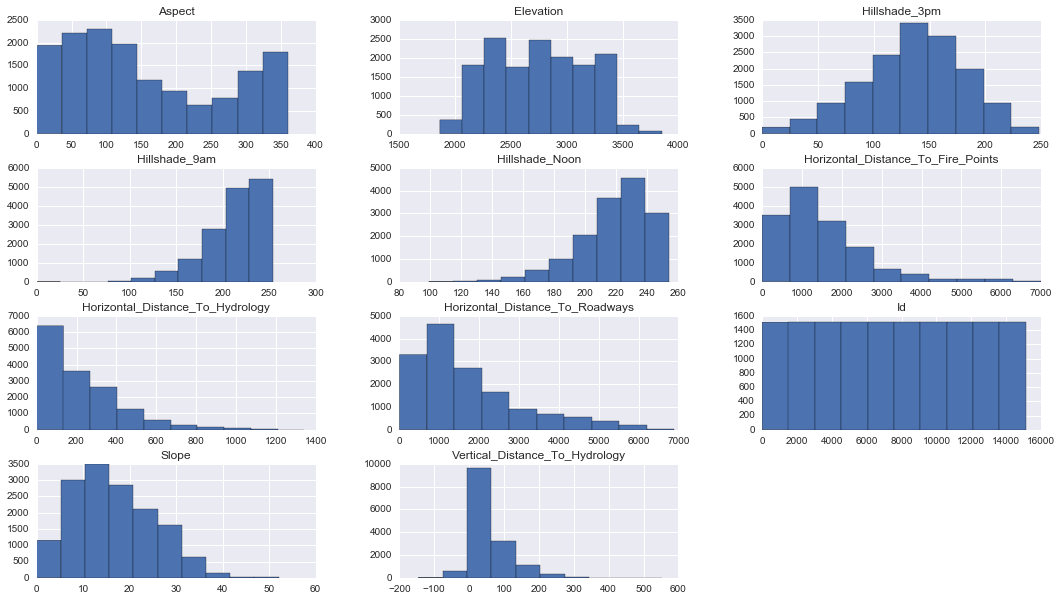

In [13]:
df.ix[:, :11].hist(figsize = (18, 10))

In [14]:
#Lets check how many are actually negative
df[df.Vertical_Distance_To_Hydrology < 0].groupby('Cover_Type').count()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
2,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
3,117,117,117,117,117,117,117,117,117,117,...,117,117,117,117,117,117,117,117,117,117
4,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
5,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
6,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
7,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [15]:
df['water_aboveorbelow'] = (df.Vertical_Distance_To_Hydrology >= 0) * 1

Not much information...

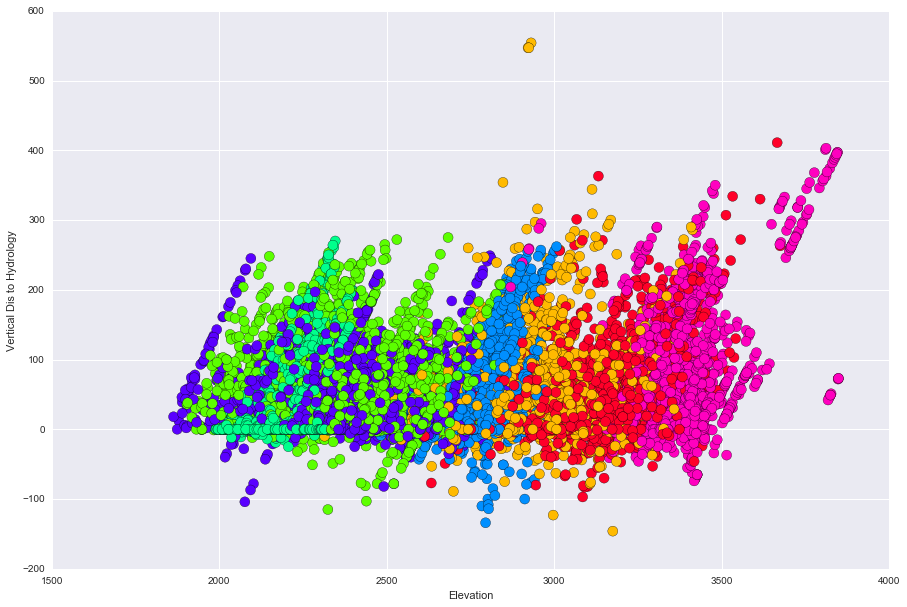

In [16]:
plt.figure(figsize = (15, 10))
plt.scatter(df.Elevation, df.Vertical_Distance_To_Hydrology, c = df.Cover_Type, cmap = cm.gist_rainbow, s = 100)
plt.xlabel("Elevation")
plt.ylabel("Vertical Dis to Hydrology")

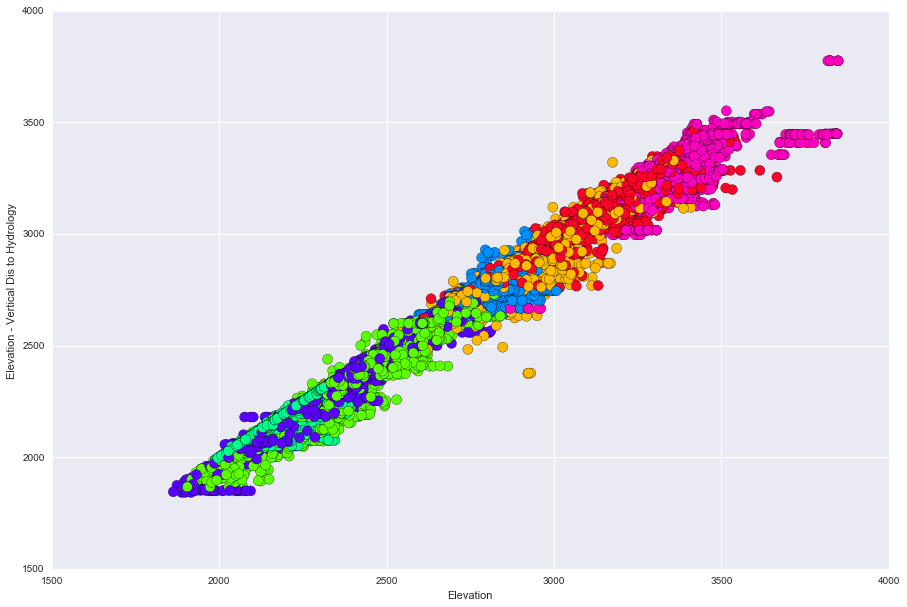

In [17]:
plt.figure(figsize = (15, 10))
plt.scatter(df.Elevation, - df.Vertical_Distance_To_Hydrology + df.Elevation
            , c = df.Cover_Type, cmap = cm.gist_rainbow, s = 100)
plt.xlabel("Elevation")
plt.ylabel("Elevation - Vertical Dis to Hydrology")

Well interesting plots above, some of my notations - 
    
* Horizontal distance to the roadways is increasing as the elevation is increasing from the scatter matrix above.
* Many of the features are quite not strong enough, like one above vertical distance to hydrology. It kind of remains constant for all the forest types 
* One of the most important features I see is Elevation.... it can be seen forming clusters in the above plots.

### Analysis 

In [18]:
#Hmm lets first create a train-test split 
from sklearn.cross_validation import train_test_split
feature_space = df.ix[:, :51]
feature_space['wat_aborbel'] = df['water_aboveorbelow']
feature_space.drop('Id', inplace=True, axis = 1)
cover_types = df['Cover_Type']
Xtrain, Xtest, ytrain, ytest = train_test_split(feature_space, cover_types, test_size = 0.2)

In [19]:
feature_space.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,wat_aborbel
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,1,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#implement the gridsearch method for parameter optimisation
from sklearn.grid_search import GridSearchCV
def grid_search_cv(clf, x, y, params, cv = 5):
    gs = GridSearchCV(clf, param_grid = params, cv = cv)
    gs.fit(x, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best_estimator = gs.best_estimator_
    return best_estimator

In [21]:
Xtrain.shape, ytrain.shape

((12096, 51), (12096,))

In [22]:
#First I'll try my hands on the SVM with varied costs and gamma for rbf and polynomial kernel 
from sklearn import svm
sv = svm.SVC(kernel = 'rbf', cache_size = 5000, C = 5, gamma = 10)
sv.fit(Xtrain, ytrain)

SVC(C=5, cache_size=5000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### The above snippet's gonna take a hell lot of time :(

In [31]:
#This was the score when I used the default kernel 
#clf.score(Xtest, ytest)

0.13657407407407407

Holy mother of God, how can this thing perform so poorly? Oh we didn't choose a kernel. Darn!

In [24]:
#Well I hope this time it works better.
sv.predict(Xtest)

array([3, 3, 3, ..., 3, 3, 3])

In [48]:
ytrain.values

array([2, 7, 1, ..., 6, 6, 3])

In [34]:
#I tried this after writing the email...
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
clf.score(Xtest, ytest)

0.85648148148148151

In [40]:
pd.DataFrame(clf.feature_importances_,index=Xtrain.columns).sort([0], ascending=False) [:10]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
Elevation,0.236196
Horizontal_Distance_To_Roadways,0.093645
Horizontal_Distance_To_Fire_Points,0.074854
Horizontal_Distance_To_Hydrology,0.062616
Vertical_Distance_To_Hydrology,0.053499
Hillshade_9am,0.052204
Aspect,0.050185
Hillshade_3pm,0.046668
Wilderness_Area4,0.046223
Hillshade_Noon,0.045302


In [ ]:
forest = ensemble.ExtraTreesClassifier(n_estimators=400, criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='auto', 
    bootstrap=False, oob_score=False, n_jobs=-1, random_state=None, verbose=0, 
    min_density=None)
